## Listing 4.1

Gewichtsvektor am Ende des Trainings:
[-1.  1.  1.]
Auswertung am Ende des Trainings:
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


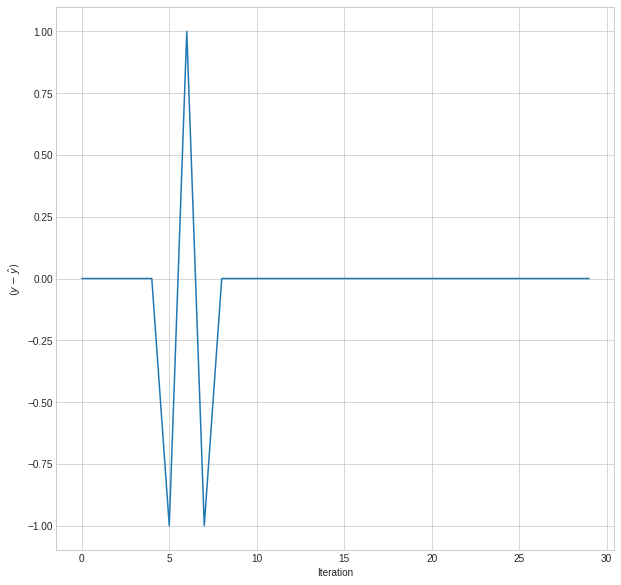

In [12]:
import matplotlib.pyplot as plt
# für Zufallszahlen
from random import choice
from numpy import array, dot, zeros, random
# für plotanzeige im JNB
%matplotlib inline

# heaviside als lambda
heaviside = lambda x : 0 if x < 0 else 1

def fit(iterations, training_data_set, w):
    """ Lernen im Perceptron 
    iterations: Ein Vorwärts- und Rückwärtslauf aller Trainingsbeispiele
    trainings_data_set: Die Trainingsbeispiele
    w: Die Gewichte zum Starten
    """

    errors = []
    weights = []

    for i in range(iterations):
        # zufällige Auswahl eines Trainingsbeispiels random.choice
        # ein Vector!
        training_data = choice(training_data_set)
        x = training_data[0] 
        y = training_data[1]

        # Output errechnen: Gewichtete Summe und Stufenfunktion
        y_hat = heaviside(dot(w, x))

        # Fehler berechnen und sammeln
        error = y - y_hat
        errors.append(error)

        # Gewichte sammeln für spätere Ausgabe
        weights.append(w)
        # Gewichtsanpassung = Das Lernen… x_i ist entweder 0 oder 1
        w += error * x
       
    return errors, weights


def main():
    """ Hauptprogramm
    Hier werden die einzelnen Bausteine zusammengesetzt
    """
    # Trainingsdaten: jede Zeile ein Tupel mit input-Vector, gewünschtem Ergebnis
    # An der Indexposition 0 des Inputvektors ist das Bias Neuron
    training_data_set = [
        (array([1,0,0]), 0),
        (array([1,0,1]), 1),
        (array([1,1,0]), 1),
        (array([1,1,1]), 1),
    ]

    # Reproduzierbarkeit der Ergebnisse
    random.seed( 12 ) # irgendein Wert

    # Array von Länge 3 mit 0 initialisieren
    w = zeros(3)
    # Die Anzahl der Durchläufe. Erfahrungswert durch Probieren
    iterations = 30

    # Trainieren mit fit()
    # Wir sammeln die Fehler/Gewichte in jedem Schritt für die grafische Ausgabe
    errors, weights = fit(iterations, training_data_set, w) 
    # Den letzten Gewichtsvektor ausgeben
    w = weights[iterations-1]
    print("Gewichtsvektor am Ende des Trainings:")
    print(w)

    # Auswertung nach dem Trainieren
    print("Auswertung am Ende des Trainings:")
    for x, y in training_data_set:
        y_hat = heaviside(dot(x, w))
        print(F"{x}: {y} -> {y_hat}") 

    # Grafik für Fehler pro Lernbeispiel :-)  
    # Figure Nummern Start
    fignr = 1
    # Druckgröße in inch
    plt.figure(fignr,figsize=(10,10))
    # Ausgabe Fehler als Plot
    plt.plot(errors)
    # Raster
    plt.style.use('seaborn-whitegrid')  
    # Labels
    plt.xlabel('Iteration')
    # Label der y-Achse mit Hilfe von LaTex
    plt.ylabel(r"$(y - \hat y)$")
    # Plot anzeigen
    plt.show()    

# Hauptprogramm 
main()
